In [2]:
#Notebook Template

import pandas as pd
import seaborn as sns


In [3]:
#Download dataset from Github

!wget https://raw.githubusercontent.com/montrondsim-lab/FAANG-Predictive-Analytics/main/data/archive.zip -O archive.zip


--2025-12-11 01:53:54--  https://raw.githubusercontent.com/montrondsim-lab/FAANG-Predictive-Analytics/main/data/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534924 (522K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>] 522.39K  --.-KB/s    in 0.04s   

2025-12-11 01:53:54 (12.8 MB/s) - ‘archive.zip’ saved [534924/534924]



In [4]:
#Unzip the archive into a data folder

!unzip archive.zip -d data


Archive:  archive.zip
  inflating: data/Amazon.csv         
  inflating: data/Apple.csv          
  inflating: data/Facebook.csv       
  inflating: data/Google.csv         
  inflating: data/Netflix.csv        


In [5]:
#Load CSV files

import pandas as pd

amazon = pd.read_csv("data/Amazon.csv")
apple = pd.read_csv("data/Apple.csv")
facebook = pd.read_csv("data/Facebook.csv")
google = pd.read_csv("data/Google.csv")
netflix = pd.read_csv("data/Netflix.csv")

amazon.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [7]:
# Inspect the Amazon dataset (structure, sample rows, summary stats)
# This helps us see column names, data types, missing values, and basic statistics.

amazon.info()
amazon.head()
amazon.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5852 non-null   object 
 1   Open       5852 non-null   float64
 2   High       5852 non-null   float64
 3   Low        5852 non-null   float64
 4   Close      5852 non-null   float64
 5   Adj Close  5852 non-null   float64
 6   Volume     5852 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 320.2+ KB


,Open,High,Low,Close,Adj Close,Volume
count,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5.852000e+03
mean,377.469557,381.737827,372.815253,377.500736,377.500736,7.512673e+06
std,596.291033,602.615299,589.226694,596.287464,596.287464,7.278144e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.995000,38.590000,37.247501,37.950001,37.950001,3.681975e+06
50%,83.699997,85.029999,82.055000,83.602501,83.602501,5.652850e+06
75%,360.852501,365.794991,357.877510,362.217506,362.217506,8.517450e+06
max,3251.060059,3344.290039,3165.429932,3225.000000,3225.000000,1.043292e+08


In [8]:
# Clean the Date column for Amazon
# Convert to datetime and sort chronologically to prepare for time-series analysis.

amazon['Date'] = pd.to_datetime(amazon['Date'])
amazon = amazon.sort_values('Date')

amazon.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [9]:
# Check for missing values in Amazon dataset

amazon.isna().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
# Create Daily Return feature for Amazon
# This measures the percent change in closing price from the previous day.

amazon['Return'] = amazon['Close'].pct_change()

amazon.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,-0.117021
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,-0.012049
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,-0.042683
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,-0.127389


In [11]:
# Add 5-day and 20-day moving averages
# These features help the model understand short-term and medium-term trends.

amazon['MA5'] = amazon['Close'].rolling(window=5).mean()
amazon['MA20'] = amazon['Close'].rolling(window=20).mean()

amazon.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Return,MA5,MA20
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,-0.117021,NaN,NaN
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,-0.012049,NaN,NaN
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,-0.042683,NaN,NaN
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,-0.127389,1.691667,NaN


In [12]:
# Add 20-day rolling volatility feature
# Volatility is calculated as the rolling standard deviation of daily returns.

amazon['Volatility20'] = amazon['Return'].rolling(window=20).std()

amazon.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Return,MA5,MA20,Volatility20
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN,NaN,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,-0.117021,NaN,NaN,NaN
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,-0.012049,NaN,NaN,NaN
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,-0.042683,NaN,NaN,NaN
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,-0.127389,1.691667,NaN,NaN


In [13]:
# Create Target variable (1 = price goes up tomorrow, 0 = price goes down or stays the same)
# This turns the problem into a binary classification task.

amazon['Target'] = (amazon['Close'].shift(1) < amazon['Close']).astype(int)

# Quick check: see Date, Close, and Target for a few rows
amazon[['Date', 'Close', 'Target']].head(10)


,Date,Close,Target
0,1997-05-15,1.958333,0
1,1997-05-16,1.729167,0
2,1997-05-19,1.708333,0
3,1997-05-20,1.635417,0
4,1997-05-21,1.427083,0
5,1997-05-22,1.395833,0
6,1997-05-23,1.500000,1
7,1997-05-27,1.583333,1
8,1997-05-28,1.531250,0
9,1997-05-29,1.505208,0


In [14]:
# Remove rows with missing values created by rolling windows
# This ensures the dataset is clean and ready for modeling.

amazon_clean = amazon.dropna().copy()

# View the cleaned dataset shape
amazon_clean.shape


(5832, 12)

In [15]:
# Select features (X) and target (y) for modeling

feature_cols = ['Return', 'MA5', 'MA20', 'Volatility20']
X = amazon_clean[feature_cols]
y = amazon_clean['Target']

X.head(), y.head()


(      Return       MA5      MA20  Volatility20
 20 -0.012987  1.600000  1.555990      0.057602
 21 -0.006579  1.577083  1.548177      0.051688
 22 -0.043047  1.561458  1.538021      0.052420
 23  0.003461  1.555208  1.531771      0.051684
 24  0.000000  1.536458  1.535938      0.042549,
 20    0
 21    0
 22    0
 23    1
 24    0
 Name: Target, dtype: int64)

In [18]:
# Split Amazon data into training and testing sets
# 80% of data is used for training, 20% held out for evaluation.
# shuffle=False keeps the time order (important for stock data).

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

X_train.shape, X_test.shape



((4665, 4), (1167, 4))

In [19]:
# Train a Logistic Regression model to predict next-day price direction

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7532133676092545

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62       515
           1       0.70      0.98      0.82       652

    accuracy                           0.75      1167
   macro avg       0.83      0.72      0.72      1167
weighted avg       0.81      0.75      0.73      1167



In [20]:
# Train a Random Forest model to predict next-day price direction

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00       652

    accuracy                           1.00      1167
   macro avg       1.00      1.00      1.00      1167
weighted avg       1.00      1.00      1.00      1167



In [21]:
# Compare Logistic Regression and Random Forest performance

import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy, rf_accuracy]
})

results


,Model,Accuracy
0,Logistic Regression,0.753213
1,Random Forest,1.000000


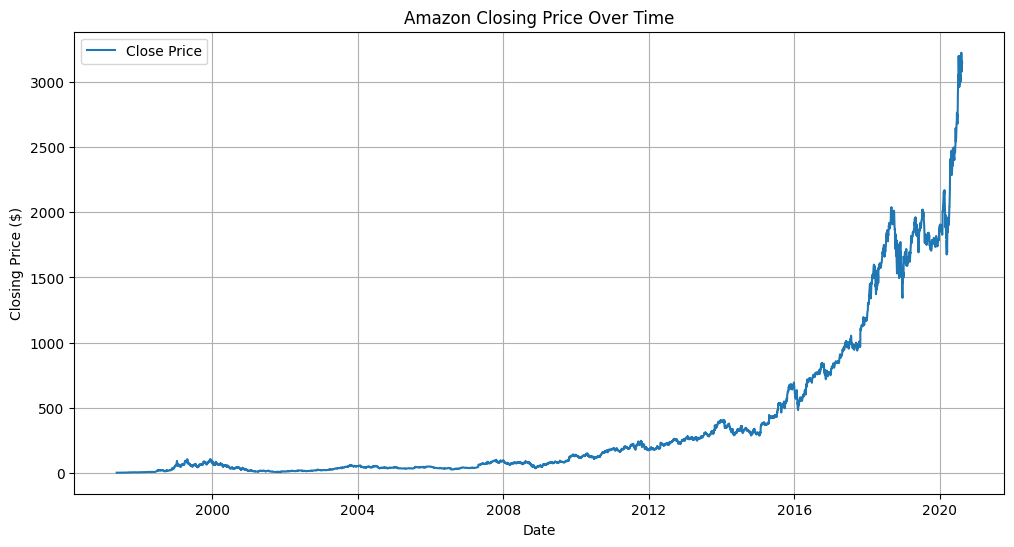

In [22]:
# EDA Plot 1 — Amazon Closing Price Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(amazon['Date'], amazon['Close'], label='Close Price')
plt.title("Amazon Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.grid(True)
plt.legend()
plt.show()


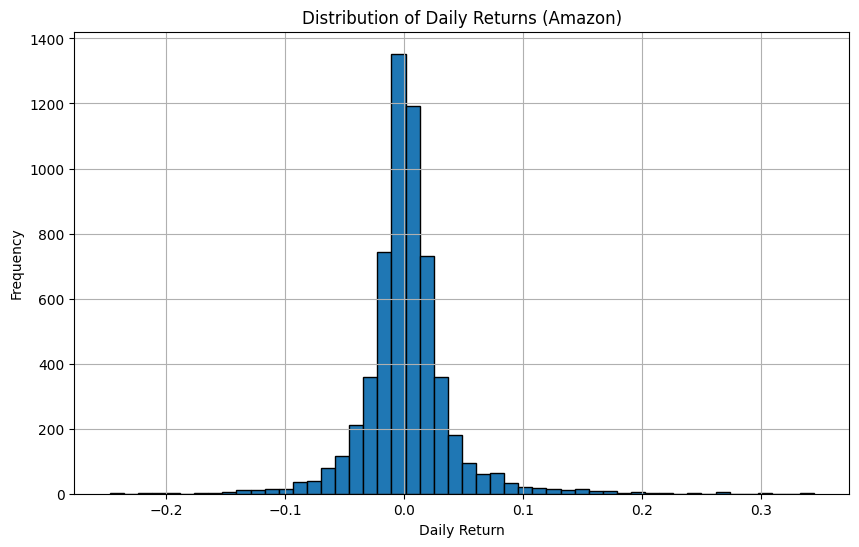

In [23]:
# EDA Plot 2 — Distribution of Daily Returns

plt.figure(figsize=(10,6))
plt.hist(amazon_clean['Return'], bins=50, edgecolor='black')
plt.title("Distribution of Daily Returns (Amazon)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


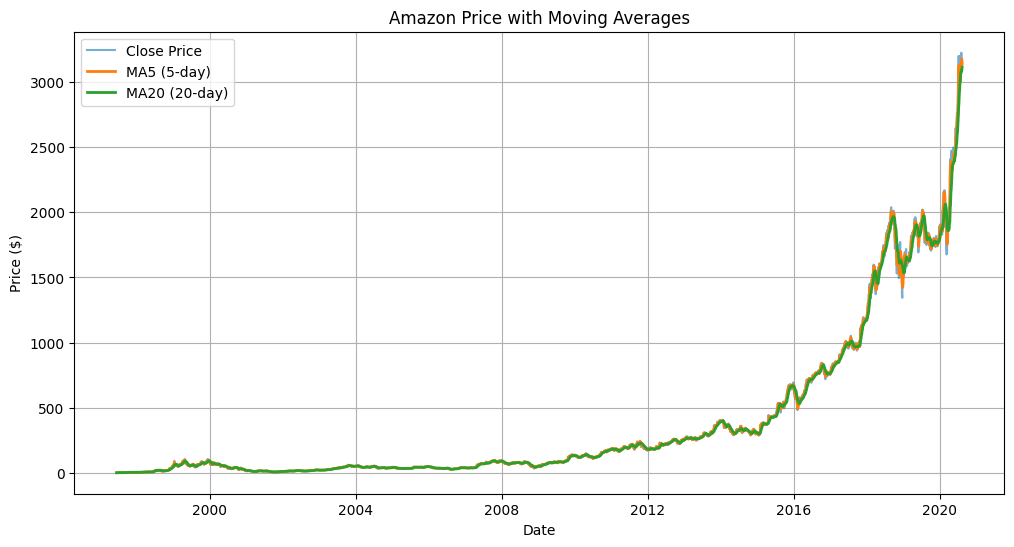

In [24]:
# EDA Plot 3 — Closing Price with 5-day and 20-day Moving Averages

plt.figure(figsize=(12,6))
plt.plot(amazon_clean['Date'], amazon_clean['Close'], label='Close Price', alpha=0.6)
plt.plot(amazon_clean['Date'], amazon_clean['MA5'], label='MA5 (5-day)', linewidth=2)
plt.plot(amazon_clean['Date'], amazon_clean['MA20'], label='MA20 (20-day)', linewidth=2)

plt.title("Amazon Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.show()


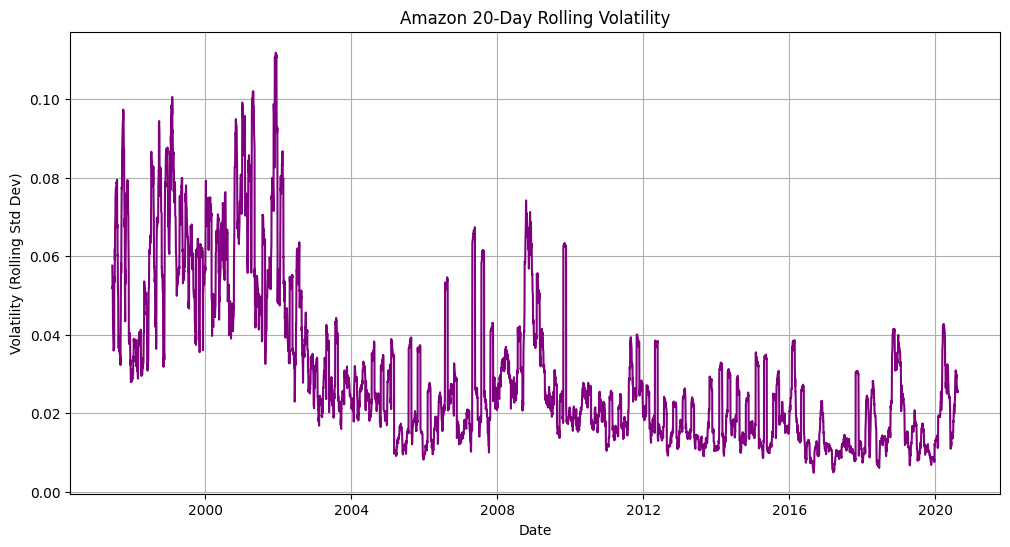

In [25]:
# EDA Plot 4 — 20-Day Rolling Volatility Over Time

plt.figure(figsize=(12,6))
plt.plot(amazon_clean['Date'], amazon_clean['Volatility20'], color='purple')
plt.title("Amazon 20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Rolling Std Dev)")
plt.grid(True)
plt.show()



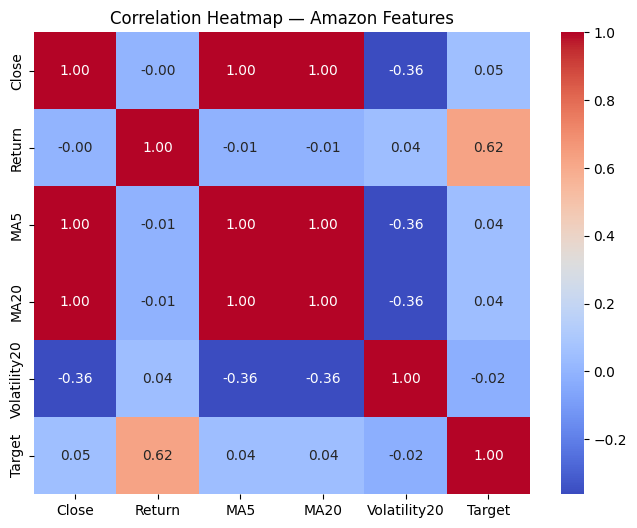

In [27]:
# EDA Plot 5 — Correlation Heatmap of Key Features

import seaborn as sns

plt.figure(figsize=(8,6))
corr = amazon_clean[['Close', 'Return', 'MA5', 'MA20', 'Volatility20', 'Target']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap — Amazon Features")
plt.show()


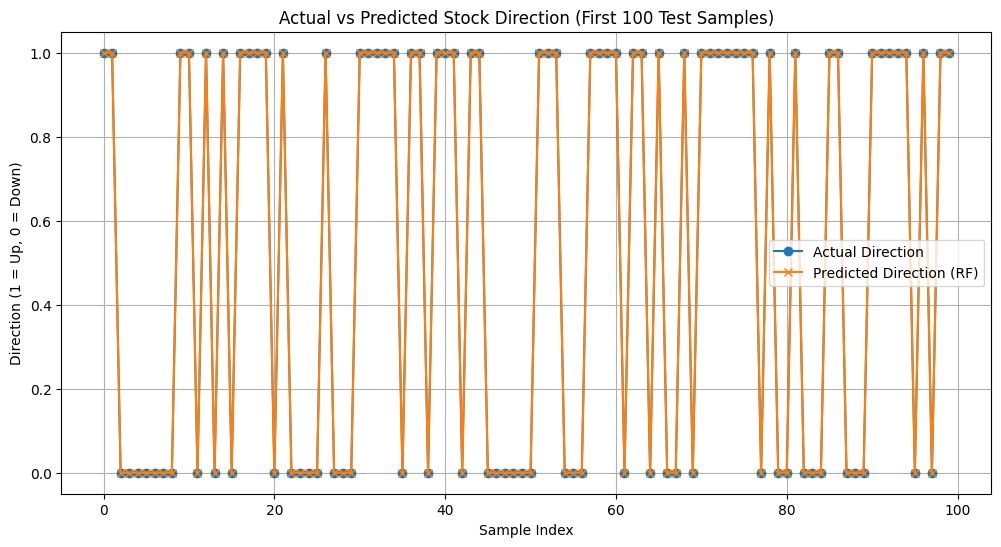

In [28]:
# EDA Plot 6 — Actual vs Predicted Stock Direction (Random Forest)

plt.figure(figsize=(12,6))

plt.plot(y_test.values[:100], label='Actual Direction', marker='o')
plt.plot(rf_pred[:100], label='Predicted Direction (RF)', marker='x')

plt.title("Actual vs Predicted Stock Direction (First 100 Test Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Direction (1 = Up, 0 = Down)")
plt.legend()
plt.grid(True)
plt.show()


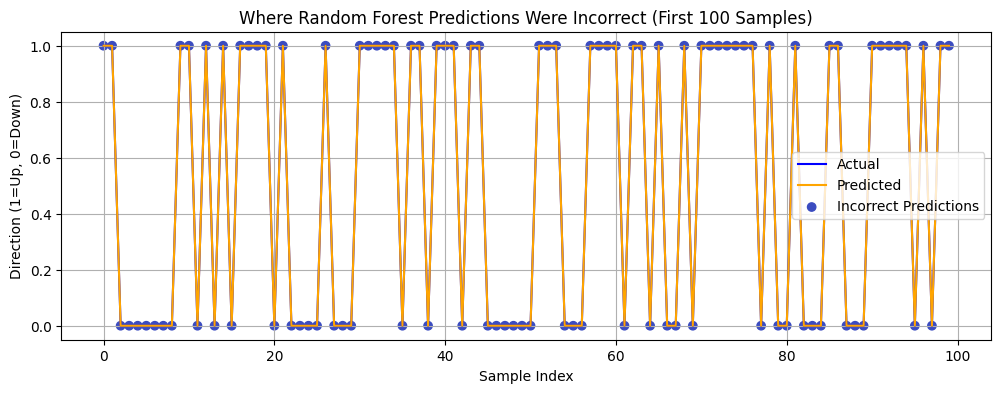

In [31]:
# Highlight where predictions were incorrect
incorrect = (y_test.values != rf_pred)

plt.figure(figsize=(12,4))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(rf_pred[:100], label='Predicted', color='orange')

# Plot incorrect points as red dots
plt.scatter(range(100), rf_pred[:100], c=incorrect[:100], cmap="coolwarm", label='Incorrect Predictions')

plt.title("Where Random Forest Predictions Were Incorrect (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Direction (1=Up, 0=Down)")
plt.legend()
plt.grid(True)
plt.show()


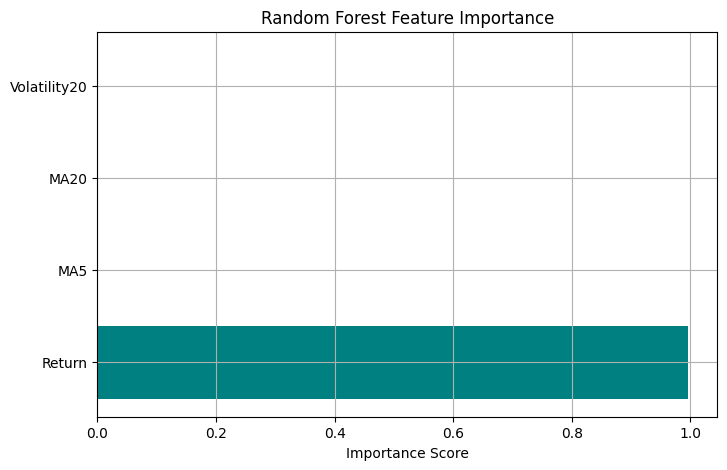

In [32]:
# EDA Plot 7 — Feature Importance for Random Forest

import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances, color='teal')
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.grid(True)
plt.show()


In [34]:
#Is Return dynamic and are MA5 and MA20 mostly Nan

amazon_clean[['Return', 'MA5', 'MA20', 'Volatility20']].head(20)


,Return,MA5,MA20,Volatility20
20,-0.012987,1.600000,1.555990,0.057602
21,-0.006579,1.577083,1.548177,0.051688
22,-0.043047,1.561458,1.538021,0.052420
23,0.003461,1.555208,1.531771,0.051684
24,0.000000,1.536458,1.535938,0.042549
25,0.010345,1.525000,1.542448,0.042137
26,-0.017065,1.510417,1.542448,0.039074
27,0.006945,1.511459,1.538802,0.036936
28,0.000000,1.511459,1.537761,0.036200
29,0.000000,1.511459,1.538021,0.035980


In [36]:
# Create a reusable modeling function for any stock DataFrame

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def process_stock(df):

    # 1. Clean date
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    # 2. Feature engineering
    df['Return'] = df['Close'].pct_change()
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['Volatility20'] = df['Return'].rolling(window=20).std()

    # 3. Target variable
    df['Target'] = (df['Close'].shift(1) < df['Close']).astype(int)

    # 4. Remove NaN rows
    df = df.dropna()

    # 5. Select features and target
    feature_cols = ['Return', 'MA5', 'MA20', 'Volatility20']
    X = df[feature_cols]
    y = df['Target']

    # 6. Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    # 7. Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred_lr = log_reg.predict(X_test)
    lr_acc = accuracy_score(y_test, y_pred_lr)

    # 8. Random Forest
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_acc = accuracy_score(y_test, y_pred_rf)

    return lr_acc, rf_acc


In [37]:
#  Run the pipeline for ALL FAANG stocks

models_results = {
    'Amazon': process_stock(amazon),
    'Apple': process_stock(apple),
    'Facebook': process_stock(facebook),
    'Google': process_stock(google),
    'Netflix': process_stock(netflix)
}

models_results


/tmp/ipython-input-3659394411.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['Close'].pct_change()


{'Amazon': (0.7532133676092545, 1.0),
 'Apple': (0.7249498997995992, 1.0),
 'Facebook': (0.691747572815534, 1.0),
 'Google': (0.7515527950310559, 0.9987577639751553),
 'Netflix': (0.7743702081051479, 0.9989047097480832)}

In [38]:
# Corrected modeling function (no data leakage) (AI assistance)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def process_stock(df):

    df = df.copy()

    # 1. Clean date and sort
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    # 2. Core features (current-day values)
    df['Return'] = df['Close'].pct_change()
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['Volatility20'] = df['Return'].rolling(window=20).std()

    # 3. Target: did price go up today vs yesterday?
    df['Target'] = (df['Close'] > df['Close'].shift(1)).astype(int)

    # 4. Lag features by 1 day so we only use PAST info to predict TODAY
    df['Return_lag1'] = df['Return'].shift(1)
    df['MA5_lag1'] = df['MA5'].shift(1)
    df['MA20_lag1'] = df['MA20'].shift(1)
    df['Volatility20_lag1'] = df['Volatility20'].shift(1)

    # 5. Drop rows with NaNs (from rolling + shifting)
    df = df.dropna().copy()

    # 6. Features and target
    feature_cols = ['Return_lag1', 'MA5_lag1', 'MA20_lag1', 'Volatility20_lag1']
    X = df[feature_cols]
    y = df['Target']

    # 7. Train/test split (time-ordered)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    # 8. Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred_lr = log_reg.predict(X_test)
    lr_acc = accuracy_score(y_test, y_pred_lr)

    # 9. Random Forest
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_acc = accuracy_score(y_test, y_pred_rf)

    return lr_acc, rf_acc


In [40]:
# Re-run the pipeline for ALL FAANG stocks with corrected function

models_results = {
    'Amazon': process_stock(amazon),
    'Apple': process_stock(apple),
    'Facebook': process_stock(facebook),
    'Google': process_stock(google),
    'Netflix': process_stock(netflix)
}

models_results


/tmp/ipython-input-3526974789.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['Close'].pct_change()


{'Amazon': (0.5578406169665809, 0.45158526135389887),
 'Apple': (0.5288220551378446, 0.4867167919799499),
 'Facebook': (0.5498783454987834, 0.49148418491484186),
 'Google': (0.5373134328358209, 0.48507462686567165),
 'Netflix': (0.4824561403508772, 0.5032894736842105)}

In [41]:
# Convert FAANG model results into a clean table

import pandas as pd

results_df = pd.DataFrame.from_dict(
    models_results,
    orient='index',
    columns=['Logistic_Accuracy', 'RandomForest_Accuracy']
)

results_df = results_df.round(4)
results_df


,Logistic_Accuracy,RandomForest_Accuracy
Amazon,0.5578,0.4516
Apple,0.5288,0.4867
Facebook,0.5499,0.4915
Google,0.5373,0.4851
Netflix,0.4825,0.5033
